# Simulating a poisson process

## Poison distribution

**Density** $P(X=k) = \exp^{-u}\dfrac{\mu^k}{k!}$

**Importing libraries**

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use("science")
import math
import matplotlib as mpl
from random import shuffle

**Probability mass function (pmf)**

In [2]:
def poisson_pmf(x, mu):
    return np.array([np.exp(-mu)* (mu**xi)/math.factorial(int(xi)) for xi in x])

In [3]:
n = 10
x = np.linspace(0, n, 10)

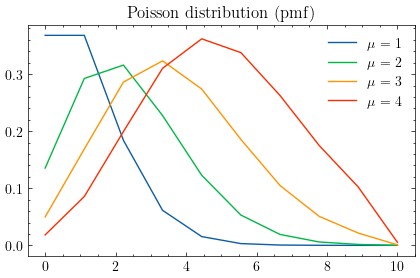

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))
for i in range(1, 5):
    plt.plot(x, poisson_pmf(x, i), label = r"$\mu$ = " + str(i))
plt.title("Poisson distribution (pmf)")
plt.legend()
plt.show()

## Simulating a poisson distribution

**Inverse transform method**

In [9]:
def simulate_inverse_transform(mu, n, m = 1000):
    y = np.zeros(m)
    i = 0
    while i < m:
        p = 1.
        x = 0
        e = np.exp(-mu)
        while p > e:
            u = np.random.uniform()
            p = u * p
            x += 1
        y[i] = float(x)
        i += 1
    return y

In [10]:
s1 = simulate_inverse_transform(1., 10)
s2 = simulate_inverse_transform(2., 10)
s3 = simulate_inverse_transform(3., 10)
s4 = simulate_inverse_transform(4., 10)

In [11]:
simul = [s1, s2, s3, s4]

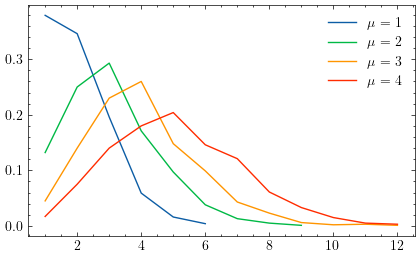

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))
for i in range(1, 5):
    s_unique, freq = np.unique(simul[i - 1], return_counts=True)
    freq = freq.astype(np.float64) / freq.sum()
    plt.plot(s_unique, freq, label = r"$\mu$ = " + str(i))
plt.legend()
plt.show()

## Simulating a poisson process

1. Simulate $W_1, W_2, ..., W_n \sim \exp(\mu)$
2. Set $T_k = W_1 + W_2 + ... + W_k$
where
- $T_k$: waiting time until the kth event
- $W_k = T_k - T_{k-1}$: Interarrival time between events $k - 1$ and $k$

In [13]:
# Simulate exp(mu) with the inverse transform method
def simulate_exp(mu, m = 1000):
    u = np.random.uniform(0, 1, m)
    return - np.log(1 - u) / mu

In [14]:
# Simulate poisson process(mu)
def simulate_poisson(mu, m = 1000):
    w = simulate_exp(mu, m)
    t = np.cumsum(w)
    return t

In [15]:
s1 = simulate_poisson(1)
s2 = simulate_poisson(2)
s3 = simulate_poisson(3)
s4 = simulate_poisson(4)
simul = [s1, s2, s3, s4]

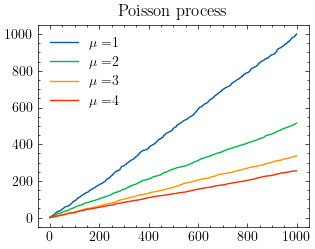

In [16]:
for i in range(4):
    plt.plot(simul[i], label = "$\mu =$" + str(i + 1))
plt.title("Poisson process")
plt.legend()
plt.show()